In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def load_raw_data(filename):  # load the json data to list(dict()) for MATH 23K
    print("Reading lines...")
    f = open(filename, encoding="utf-8")
    js = ""
    data = []
    for i, s in enumerate(f):
        js += s
        i += 1
        if i % 7 == 0:  # every 7 line is a json
            data_d = json.loads(js)
            if "千米/小时" in data_d["equation"]:
                data_d["equation"] = data_d["equation"][:-5]
            data.append(data_d)
            js = ""

    return data

In [3]:
datas = load_raw_data("./Math_23K.json")

Reading lines...


In [6]:
texts = []
for data in datas:
    texts.append(data['segmented_text'])

镇海 雅乐 学校 二年级 的 小朋友 到 一条 小路 的 一边 植树 ． 小朋友 们 每隔 2 米 种 一棵树 （ 马路 两头 都 种 了 树 ） ， 最后 发现 一共 种 了 11 棵 ， 这 条 小路 长 多少 米 ．


In [9]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)

In [12]:
tfidf_model = tfidf.fit(texts)
tfidf_result = tfidf.transform(texts)

In [13]:
print (tfidf_model.vocabulary_)

{'雅乐': 3184, '学校': 1508, '二年级': 814, '小朋友': 1577, '一条': 576, '小路': 1593, '一边': 620, '植树': 2150, '每隔': 2230, '一棵树': 585, '马路': 3241, '两头': 718, '最后': 2029, '发现': 1242, '一共': 531, '11': 29, '多少': 1412, '工程队': 1637, '挖土': 1852, '第一天': 2602, '316': 261, '开始': 1715, '每天': 2197, '230': 188, '连续': 3069, '这个': 3042, '一周': 543, '一本': 574, '故事书': 1932, '全书': 965, '24': 195, '页数': 3211, '前两天': 1136, '总数': 1764, '150': 85, '这时': 3052, '还有': 3039, '没有': 2286, '那么': 3091, '本书': 2068, '甲地': 2431, '乙地': 795, '如果': 1489, '自行车': 2738, '小时': 1576, '行驶': 2832, '16': 95, '千米': 1186, '可以': 1268, '到达': 1128, '汽车': 2281, '需要': 3194, '体重': 900, '28': 232, '千克': 1184, '小强': 1572, '10': 10, '所得': 1795, '除以': 3179, '原有': 1226, '学生': 1510, '700': 436, '月份': 2038, '毕业': 2236, '280': 233, '新生': 1979, '350': 285, '原来': 1227, '增加': 1396, '百分之几': 2479, '一套': 551, '住房': 885, '售价': 1318, '万元': 630, '每年': 2201, '才能': 1804, '叔叔': 1248, '开车': 1722, '70': 435, '速度': 3084, '返回': 3037, '由于': 2429, '任务': 868, '加快': 1162, '只用': 

In [15]:
print (tfidf_result)

  (0, 3241)	0.25157101351303385
  (0, 3184)	0.284360413164364
  (0, 2230)	0.18721439527807243
  (0, 2150)	0.1791886834616691
  (0, 2029)	0.19383768690144568
  (0, 1593)	0.5097235382645062
  (0, 1577)	0.39608692909369325
  (0, 1508)	0.12061980558777764
  (0, 1412)	0.039889922301572386
  (0, 1242)	0.20827247866566442
  (0, 814)	0.22422724389582332
  (0, 718)	0.2548617691322531
  (0, 620)	0.22172724673455615
  (0, 585)	0.23321250170856836
  (0, 576)	0.13543195031253402
  (0, 531)	0.10684351378440946
  (0, 29)	0.16235404904049788
  (1, 3069)	0.2404593872099547
  (1, 3042)	0.13717506884347544
  (1, 2602)	0.15837585889721334
  (1, 2197)	0.13384296827161482
  (1, 1852)	0.6369184611670077
  (1, 1715)	0.2440902105195552
  (1, 1637)	0.40909660978426693
  (1, 1412)	0.04533824747438243
  :	:
  (23159, 1412)	0.049982618885896266
  (23159, 1282)	0.2756321735922374
  (23159, 1198)	0.5652508183147407
  (23159, 704)	0.18682103325601346
  (23160, 2612)	0.2888822633102967
  (23160, 1963)	0.61431298653161

In [16]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


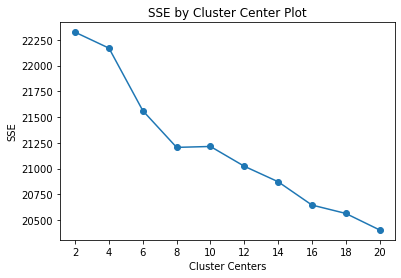

In [45]:
find_optimal_clusters(tfidf_result, 20)

In [46]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_result)

In [51]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_result, clusters, tfidf.get_feature_names(), 50)


Cluster 0
两列,之间,如果,可以,两站,上海,距离,公路,完全,已知,一列,需要,80,两辆,两城,60,分别,这样,这辆,还有,平均,路程,经过,相向,几小时,一辆,出发,相对,返回,火车,货车,甲乙,开出,客车,到达,全程,多少,开往,两车,相遇,同时,甲地,乙地,行驶,相距,速度,两地,汽车,小时,千米

Cluster 1
达标,二年级,总数,分成,这个,45,10,40,舞蹈队,光明,年级,24,20,全年,比赛,几分,120,数学,25,某班,希望,全校学生,某校,兴趣小组,实验,美术组,一共,一班,活动,捐款,合唱队,全校,小组,同学,学校,其中,植树,三年级,共有,全班,四年级,多少,小学,参加,五年级,六年级,学生,男生,人数,女生

Cluster 2
今年,电视机厂,师徒,25,增产,李师傅,全年,30,需要,计算,工作,一条,电视机,服装,15,已经,服装厂,车间,10,超产,12,几天,工人,工厂,王师傅,这样,20,去年,月份,平均,徒弟,节约,师傅,可以,工程,提前,百分之几,投资,万元,一批,小时,多少,任务,加工,每天,零件,实际,完成,生产,计划

Cluster 3
被除数,11,90,本身,72,23,48,38,增加,27,21,最小,35,150,那么,32,乘以,28,倒数,36,100,相等,14,结果,120,56,正好,16,45,18,10,24,80,50,75,加上,60,15,40,30,减去,20,25,12,等于,一个,余数,除以,这个,个数

Cluster 4
苹果,降价,出售,80,两个,100,减去,因数,120,绳子,剩下,共有,16,50,卖出,妈妈,60,其中,18,那么,24,这个,去年,40,每个,售价,每分钟,可以,30,计算,需要,同学,今年,面积,现在,原来,平均,如果,25,分钟,15,厘米,原价,12,一个,学校,10,20,一共,多少

Cluster 5
科普,200,课外书,第一周,每层,180,35,24,240,12,买来,余下,这时,40,10,平均,80,文艺,60,读完,还有,正好,25,15,应从,30,书架,图书室,连环画,学校,图书馆,几分,120,20,两天,这本,已经,剩下,共有,一共,每天,没有,科技,页数,多少,一本,第一天,全书,故

In [78]:
with open ("journey.json","a") as f1:
    j = 0
    for i in range (0, len(datas)):
        if clusters[i] == 0 and "修" not in datas[i]['original_text']:
            j += 1
            json_data = json.dumps(datas[i], indent=4, ensure_ascii=False).encode('utf8')
            f1.write(json_data.decode('utf8'))
            f1.write("\n")
        elif "车" in datas[i]['original_text'] and "千米" in datas[i]['original_text'] and "小时" in datas[i]['original_text']:
            j += 1
            json_data = json.dumps(datas[i], indent=4, ensure_ascii=False).encode('utf8')
            f1.write(json_data.decode('utf8'))
            f1.write("\n")        
print (j)

1778
